## train셋 불러오기
1. 수고, 폭, 등등이 무슨연관이 있는지 알아보기

ID : 과수나무 고유 ID
착과량(int) : 실제 감귤 착과량 (Target)
나무 생육 상태 Features (5개)
수고(m), 수관폭1(min), 수관폭2(max), 수관폭평균(수관폭1과 수관폭2의 평균)

데이터 기입은 cm 단위

새순 Features (89개)
2022년 09월 01일 ~ 2022년 11월 28일에 일별 측정된 새순 데이터

엽록소 Features (89개)
2022년 09월 01일 ~ 2022년 11월 28일에 일별 측정된 엽록소 데이터



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

train = pd.read_csv("C:/Users/hop09/JeJuTangerine/data/train.csv")
train.head()

ID  착과량(int)  수고(m)  수관폭1(min)  수관폭2(max)  수관폭평균  2022-09-01 새순  \
0  TRAIN_0000       692  275.0      287.0      292.0  289.5            2.8   
1  TRAIN_0001       534  293.0      284.0      336.0  310.0            3.3   
2  TRAIN_0002       634  300.0      392.0      450.0  421.0            3.0   
3  TRAIN_0003       639  289.0      368.0      379.0  373.5            3.1   
4  TRAIN_0004       496  306.0      353.0      358.0  355.5            3.7   

   2022-09-02 새순  2022-09-03 새순  2022-09-04 새순  ...  2022-11-19 엽록소  \
0            2.8            2.7            2.7  ...       70.978249   
1            3.3            3.3            3.2  ...       71.535483   
2            2.9            2.9            2.9  ...       71.279804   
3            3.0            3.0            3.0  ...       69.934615   
4            3.6            3.6            3.6  ...       68.313016   

   2022-11-20 엽록소  2022-11-21 엽록소  2022-11-22 엽록소  2022-11-23 엽록소  \
0       70.876794       70.705253       70.559603       70.427356   
1       71.382303       71.253604       71.092665       70.955608   
2       71.199570       71.144020       71.026740       70.920038   
3       69.884124       69.845683       69.794682       69.779813   
4       68.285364       68.209860       68.209458       68.040083   

   2022-11-24 엽록소  2022-11-25 엽록소  2022-11-26 엽록소  2022-11-27 엽록소  \
0       70.340491       70.293830       70.262422       70.169841   
1       70.796630       70.597550       70.565088       70.560502   
2       70.876723       70.710129       70.595971       70.418203   
3       69.614644       69.455404       69.281590       69.238689   
4       67.859963       67.775556       67.701456       67.504244   

   2022-11-28 엽록소  
0       70.043251  
1       70.427600  
2       70.399578  
3       69.133970  
4       67.410093  

[5 rows x 184 columns]

### train1, train2, train3으로 각각 수고, 새순, 엽록소+ 착과량으로 두기

In [5]:
train1 = train[['착과량(int)',	'수고(m)',	'수관폭1(min)',	'수관폭2(max)',	'수관폭평균']]
train1.head()

착과량(int)  수고(m)  수관폭1(min)  수관폭2(max)  수관폭평균
0       692  275.0      287.0      292.0  289.5
1       534  293.0      284.0      336.0  310.0
2       634  300.0      392.0      450.0  421.0
3       639  289.0      368.0      379.0  373.5
4       496  306.0      353.0      358.0  355.5

c:\Users\hop09\Desktop\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hop09\Desktop\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hop09\Desktop\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hop09\Desktop\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hop09\Desktop\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\hop09\

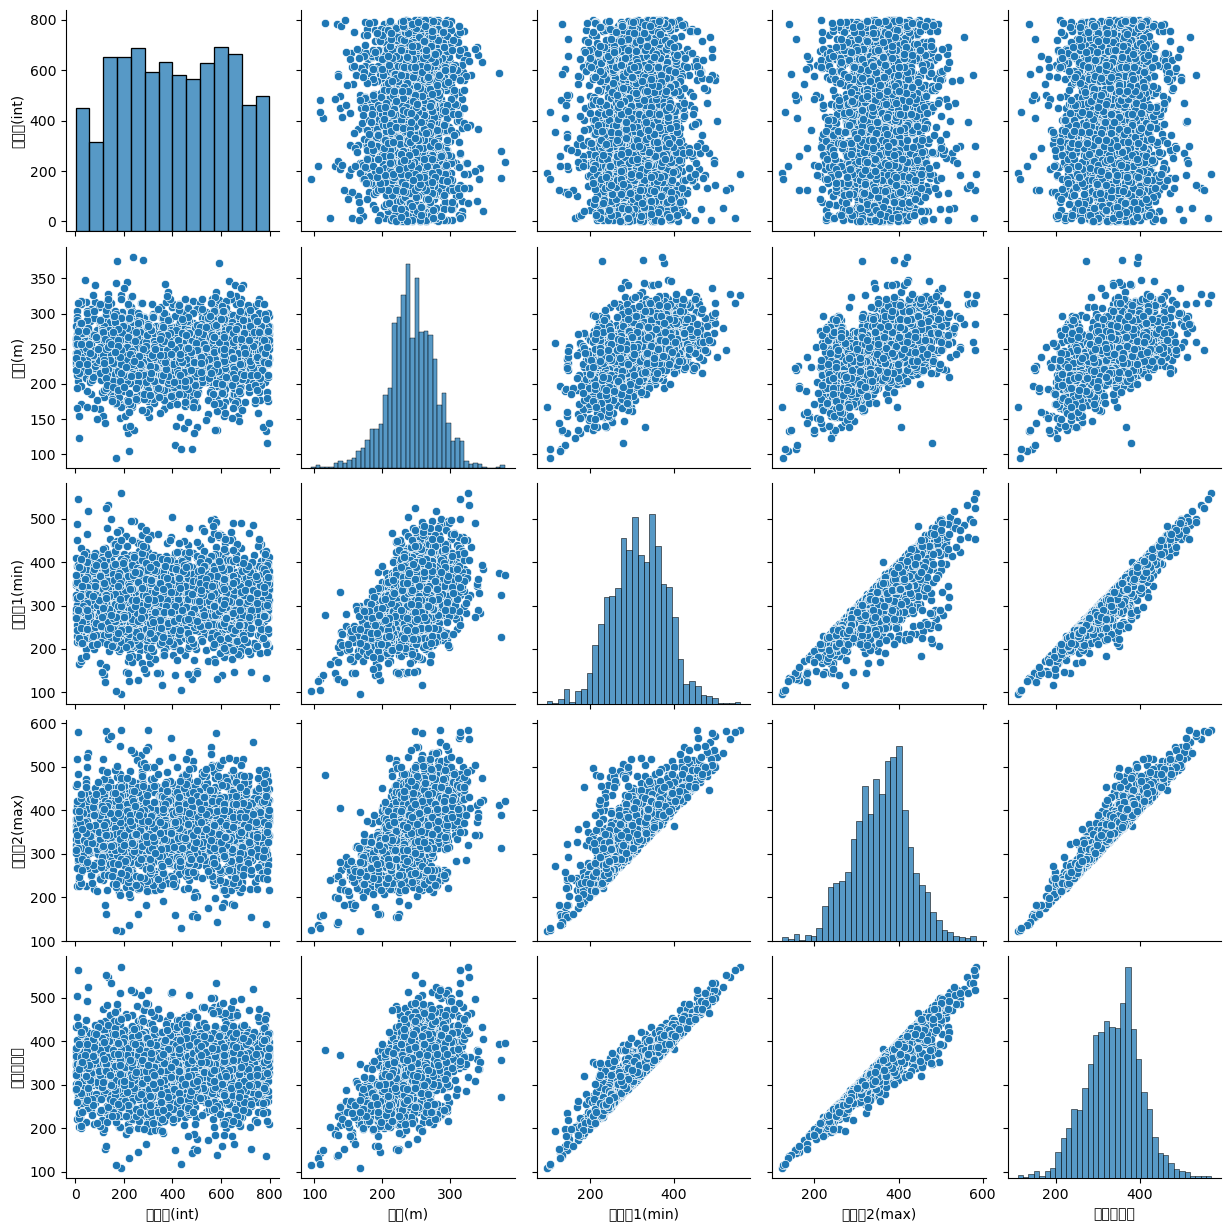

In [6]:
sns.pairplot(train1)
plt.show()

In [7]:
train1.corr()

착과량(int)     수고(m)  수관폭1(min)  수관폭2(max)     수관폭평균
착과량(int)   1.000000  0.007002   0.021279   0.037168  0.030611
수고(m)      0.007002  1.000000   0.456394   0.484295  0.490456
수관폭1(min)  0.021279  0.456394   1.000000   0.841330  0.957948
수관폭2(max)  0.037168  0.484295   0.841330   1.000000  0.961049
수관폭평균      0.030611  0.490456   0.957948   0.961049  1.000000

### 음...수고, 수관폭은 착과량과 관계가 없는 듯 하다

### 새순과 착과량의 관계 알아보기

In [17]:
train2 = train.filter(like = '새순')
train2["fruit_num"] = train["착과량(int)"]
train2_T = train2.transpose()
train2_T

C:\Users\hop09\AppData\Local\Temp\ipykernel_17612\3954867291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2["fruit_num"] = train["착과량(int)"]


0      1      2      3      4      5      6      7      8     \
2022-09-01 새순    2.8    3.3    3.0    3.1    3.7    4.1    2.8    3.4    2.8   
2022-09-02 새순    2.8    3.3    2.9    3.0    3.6    4.1    2.8    3.4    2.8   
2022-09-03 새순    2.7    3.3    2.9    3.0    3.6    4.0    2.8    3.4    2.8   
2022-09-04 새순    2.7    3.2    2.9    3.0    3.6    4.0    2.8    3.4    2.7   
2022-09-05 새순    2.7    3.2    2.9    3.0    3.5    4.0    2.8    3.3    2.7   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
2022-11-25 새순    0.7    0.0    0.6    0.8    0.7    0.6    0.6    0.7    0.7   
2022-11-26 새순    0.7    0.0    0.6    0.7    0.7    0.5    0.6    0.6    0.7   
2022-11-27 새순    0.7    0.0    0.6    0.7    0.6    0.0    0.6    0.6    0.7   
2022-11-28 새순    0.6    0.0    0.5    0.7    0.6    0.0    0.6    0.6    0.6   
fruit_num      692.0  534.0  634.0  639.0  496.0  350.0  689.0  459.0  697.0   

                9     ...   2197   2198   2199   2200   2201   2202   2203  \
2022-09-01 새순    4.8  ...    4.5    4.5    3.6    2.8    3.4    4.7    3.1   
2022-09-02 새순    4.8  ...    4.5    4.4    3.6    2.8    3.4    4.6    3.0   
2022-09-03 새순    4.7  ...    4.5    4.4    3.5    2.8    3.4    4.5    3.0   
2022-09-04 새순    4.7  ...    4.4    4.3    3.5    2.7    3.3    4.5    3.0   
2022-09-05 새순    4.6  ...    4.4    4.3    3.5    2.7    3.3    4.4    2.9   
...              ...  ...    ...    ...    ...    ...    ...    ...    ...   
2022-11-25 새순    0.6  ...    0.7    0.7    0.6    0.8    0.7    0.6    0.7   
2022-11-26 새순    0.5  ...    0.7    0.6    0.6    0.8    0.6    0.5    0.7   
2022-11-27 새순    0.0  ...    0.6    0.6    0.6    0.8    0.6    0.0    0.7   
2022-11-28 새순    0.0  ...    0.6    0.5    0.5    0.7    0.6    0.0    0.6   
fruit_num      167.0  ...  199.0  248.0  465.0  697.0  572.0  119.0  611.0   

                2204   2205  2206  
2022-09-01 새순    3.0    3.9   5.3  
2022-09-02 새순    3.0    3.9   5.2  
2022-09-03 새순    2.9    3.8   5.2  
2022-09-04 새순    2.9    3.8   5.1  
2022-09-05 새순    2.9    3.8   5.0  
...              ...    ...   ...  
2022-11-25 새순    0.6    0.6   0.6  
2022-11-26 새순    0.6    0.6   0.5  
2022-11-27 새순    0.6    0.5   0.0  
2022-11-28 새순    0.5    0.0   0.0  
fruit_num      650.0  363.0  17.0  

[90 rows x 2207 columns]

In [ ]:
# 통계량 추가
train2_T.iloc[:-1] # 착과량 제외 전부 다 
train2_T.iloc[-1:] # fruit_nunm

train2["Mean"] = train2_T.iloc[:-1].mean()
train2["min"] = train2_T.iloc[:-1].min()
train2["Max"] = train2_T.iloc[:-1].max()
train2["std"] = train2_T.iloc[:-1].std()
train2["Var"] = train2_T.iloc[:-1].var()
train2["Diff"] = train2["2022-09-01 새순"] - train2["2022-11-28 새순"]

In [20]:
train2.columns

Index(['2022-09-01 새순', '2022-09-02 새순', '2022-09-03 새순', '2022-09-04 새순',
       '2022-09-05 새순', '2022-09-06 새순', '2022-09-07 새순', '2022-09-08 새순',
       '2022-09-09 새순', '2022-09-10 새순', '2022-09-11 새순', '2022-09-12 새순',
       '2022-09-13 새순', '2022-09-14 새순', '2022-09-15 새순', '2022-09-16 새순',
       '2022-09-17 새순', '2022-09-18 새순', '2022-09-19 새순', '2022-09-20 새순',
       '2022-09-21 새순', '2022-09-22 새순', '2022-09-23 새순', '2022-09-24 새순',
       '2022-09-25 새순', '2022-09-26 새순', '2022-09-27 새순', '2022-09-28 새순',
       '2022-09-29 새순', '2022-09-30 새순', '2022-10-01 새순', '2022-10-02 새순',
       '2022-10-03 새순', '2022-10-04 새순', '2022-10-05 새순', '2022-10-06 새순',
       '2022-10-07 새순', '2022-10-08 새순', '2022-10-09 새순', '2022-10-10 새순',
       '2022-10-11 새순', '2022-10-12 새순', '2022-10-13 새순', '2022-10-14 새순',
       '2022-10-15 새순', '2022-10-16 새순', '2022-10-17 새순', '2022-10-18 새순',
       '2022-10-19 새순', '2022-10-20 새순', '2022-10-21 새순', '2022-10-22 새순',
       '2022-10-23 새순', '

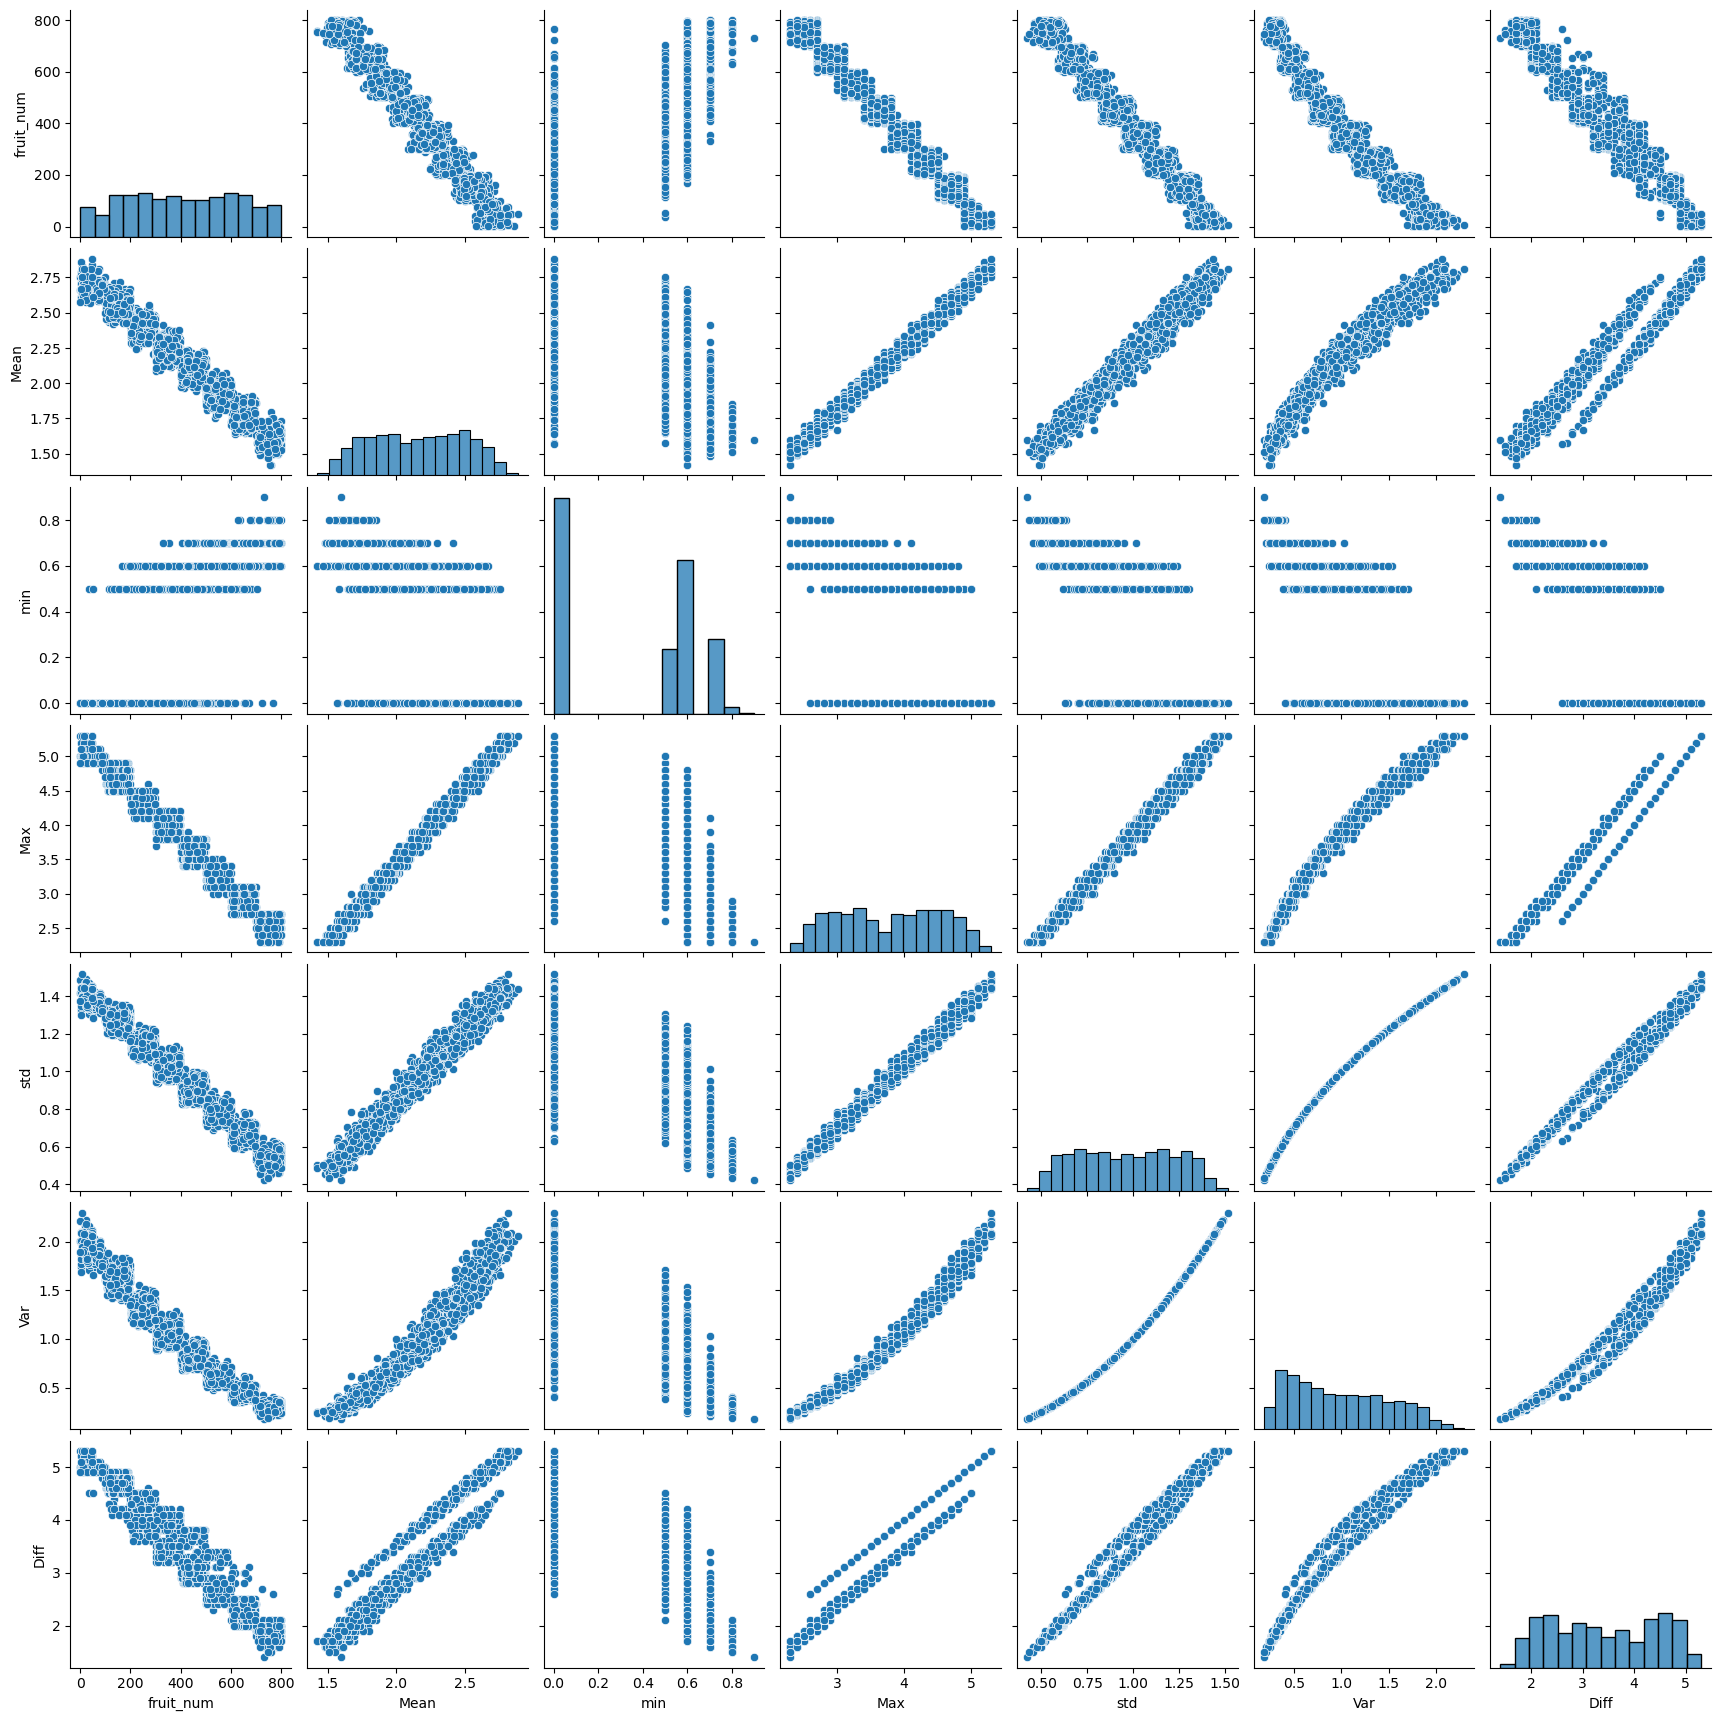

In [21]:
sns.pairplot(train2[['fruit_num', 'Mean', 'min', 'Max', 'std', 'Var','Diff']])
plt.show()

### 알아낸 점
- 평균이 작을 수록 = 새순이 작을 수록, 착과량이 많다
- 분산이 작을 수록 = 새순이 크게 자라거나 줄지않은경우 = 착과량이 많다
- 새순이 작을수록 착과량이 많다
-> 새순과 착과량은 반비례인듯

## 월별로 새순을 비교했을 때 뭔가 나오나?

In [24]:
train_Month = train.drop(columns= ['ID','수고(m)',	'수관폭1(min)',	'수관폭2(max)',	'수관폭평균'])
train_Month

착과량(int)  2022-09-01 새순  2022-09-02 새순  2022-09-03 새순  2022-09-04 새순  \
0          692            2.8            2.8            2.7            2.7   
1          534            3.3            3.3            3.3            3.2   
2          634            3.0            2.9            2.9            2.9   
3          639            3.1            3.0            3.0            3.0   
4          496            3.7            3.6            3.6            3.6   
...        ...            ...            ...            ...            ...   
2202       119            4.7            4.6            4.5            4.5   
2203       611            3.1            3.0            3.0            3.0   
2204       650            3.0            3.0            2.9            2.9   
2205       363            3.9            3.9            3.8            3.8   
2206        17            5.3            5.2            5.2            5.1   

      2022-09-05 새순  2022-09-06 새순  2022-09-07 새순  2022-09-08 새순  \
0               2.7            2.7            2.6            2.6   
1               3.2            3.1            3.1            3.1   
2               2.9            2.8            2.8            2.8   
3               3.0            2.9            2.9            2.9   
4               3.5            3.5            3.5            3.4   
...             ...            ...            ...            ...   
2202            4.4            4.4            4.3            4.3   
2203            2.9            2.9            2.9            2.9   
2204            2.9            2.9            2.8            2.8   
2205            3.8            3.7            3.7            3.6   
2206            5.0            5.0            4.9            4.9   

      2022-09-09 새순  ...  2022-11-19 엽록소  2022-11-20 엽록소  2022-11-21 엽록소  \
0               2.6  ...       70.978249       70.876794       70.705253   
1               3.0  ...       71.535483       71.382303       71.253604   
2               2.8  ...       71.279804       71.199570       71.144020   
3               2.8  ...       69.934615       69.884124       69.845683   
4               3.4  ...       68.313016       68.285364       68.209860   
...             ...  ...             ...             ...             ...   
2202            4.2  ...       66.347384       66.293609       66.193131   
2203            2.8  ...       73.438844       73.432194       73.355195   
2204            2.8  ...       67.576066       67.404347       67.394009   
2205            3.6  ...       66.766379       66.602606       66.510781   
2206            4.8  ...       72.885385       72.734930       72.629823   

      2022-11-22 엽록소  2022-11-23 엽록소  2022-11-24 엽록소  2022-11-25 엽록소  \
0          70.559603       70.427356       70.340491       70.293830   
1          71.092665       70.955608       70.796630       70.597550   
2          71.026740       70.920038       70.876723       70.710129   
3          69.794682       69.779813       69.614644       69.455404   
4          68.209458       68.040083       67.859963       67.775556   
...              ...             ...             ...             ...   
2202       66.176590       66.109845       66.008775       65.889675   
2203       73.329491       73.271361       73.088750       73.071705   
2204       67.247428       67.117025       66.933771       66.734617   
2205       66.334637       66.323613       66.248731       66.202532   
2206       72.454654       72.389570       72.271680       72.208433   

      2022-11-26 엽록소  2022-11-27 엽록소  2022-11-28 엽록소  
0          70.262422       70.169841       70.043251  
1          70.565088       70.560502       70.427600  
2          70.595971       70.418203       70.399578  
3          69.281590       69.238689       69.133970  
4          67.701456       67.504244       67.410093  
...              ...             ...             ...  
2202       65.734066       65.586656       65.560547  
2203       73.069036       72.9525

In [27]:
train_Month_S = train_Month.iloc[:, :90]
train_Month_S

착과량(int)  2022-09-01 새순  2022-09-02 새순  2022-09-03 새순  2022-09-04 새순  \
0          692            2.8            2.8            2.7            2.7   
1          534            3.3            3.3            3.3            3.2   
2          634            3.0            2.9            2.9            2.9   
3          639            3.1            3.0            3.0            3.0   
4          496            3.7            3.6            3.6            3.6   
...        ...            ...            ...            ...            ...   
2202       119            4.7            4.6            4.5            4.5   
2203       611            3.1            3.0            3.0            3.0   
2204       650            3.0            3.0            2.9            2.9   
2205       363            3.9            3.9            3.8            3.8   
2206        17            5.3            5.2            5.2            5.1   

      2022-09-05 새순  2022-09-06 새순  2022-09-07 새순  2022-09-08 새순  \
0               2.7            2.7            2.6            2.6   
1               3.2            3.1            3.1            3.1   
2               2.9            2.8            2.8            2.8   
3               3.0            2.9            2.9            2.9   
4               3.5            3.5            3.5            3.4   
...             ...            ...            ...            ...   
2202            4.4            4.4            4.3            4.3   
2203            2.9            2.9            2.9            2.9   
2204            2.9            2.9            2.8            2.8   
2205            3.8            3.7            3.7            3.6   
2206            5.0            5.0            4.9            4.9   

      2022-09-09 새순  ...  2022-11-19 새순  2022-11-20 새순  2022-11-21 새순  \
0               2.6  ...            0.9            0.8            0.8   
1               3.0  ...            0.7            0.7            0.6   
2               2.8  ...            0.8            0.8            0.7   
3               2.8  ...            0.9            0.9            0.9   
4               3.4  ...            0.9            0.9            0.8   
...             ...  ...            ...            ...            ...   
2202            4.2  ...            0.8            0.8            0.8   
2203            2.8  ...            0.9            0.9            0.8   
2204            2.8  ...            0.8            0.8            0.7   
2205            3.6  ...            0.8            0.8            0.8   
2206            4.8  ...            0.9            0.8            0.8   

      2022-11-22 새순  2022-11-23 새순  2022-11-24 새순  2022-11-25 새순  \
0               0.8            0.7            0.7            0.7   
1               0.6            0.6            0.5            0.0   
2               0.7            0.7            0.7            0.6   
3               0.8            0.8            0.8            0.8   
4               0.8            0.8            0.7            0.7   
...             ...            ...            ...            ...   
2202            0.7            0.7            0.6            0.6   
2203            0.8            0.8            0.7            0.7   
2204            0.7            0.7            0.7            0.6   
2205            0.7            0.7            0.7            0.6   
2206            0.7            0.7            0.6            0.6   

      2022-11-26 새순  2022-11-27 새순  2022-11-28 새순  
0               0.7            0.7            0.6  
1               0.0            0.0            0.0  
2               0.6            0.6            0.5  
3               0.7            0.7            0.7  
4               0.7            0.6            0.6  
...             ...            ...            ...  
2202            0.5            0.0            0.0  
2203            0.7            0.7            0.6  
2204            0.6            0.6            0.5  
2205            0.6            0.5    

In [36]:
train_ST = train_Month_S.transpose()


In [37]:
train_ST

0      1      2      3      4      5      6      7      8     \
착과량(int)       692.0  534.0  634.0  639.0  496.0  350.0  689.0  459.0  697.0   
2022-09-01 새순    2.8    3.3    3.0    3.1    3.7    4.1    2.8    3.4    2.8   
2022-09-02 새순    2.8    3.3    2.9    3.0    3.6    4.1    2.8    3.4    2.8   
2022-09-03 새순    2.7    3.3    2.9    3.0    3.6    4.0    2.8    3.4    2.8   
2022-09-04 새순    2.7    3.2    2.9    3.0    3.6    4.0    2.8    3.4    2.7   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
2022-11-24 새순    0.7    0.5    0.7    0.8    0.7    0.6    0.7    0.7    0.7   
2022-11-25 새순    0.7    0.0    0.6    0.8    0.7    0.6    0.6    0.7    0.7   
2022-11-26 새순    0.7    0.0    0.6    0.7    0.7    0.5    0.6    0.6    0.7   
2022-11-27 새순    0.7    0.0    0.6    0.7    0.6    0.0    0.6    0.6    0.7   
2022-11-28 새순    0.6    0.0    0.5    0.7    0.6    0.0    0.6    0.6    0.6   

                9     ...   2197   2198   2199   2200   2201   2202   2203  \
착과량(int)       167.0  ...  199.0  248.0  465.0  697.0  572.0  119.0  611.0   
2022-09-01 새순    4.8  ...    4.5    4.5    3.6    2.8    3.4    4.7    3.1   
2022-09-02 새순    4.8  ...    4.5    4.4    3.6    2.8    3.4    4.6    3.0   
2022-09-03 새순    4.7  ...    4.5    4.4    3.5    2.8    3.4    4.5    3.0   
2022-09-04 새순    4.7  ...    4.4    4.3    3.5    2.7    3.3    4.5    3.0   
...              ...  ...    ...    ...    ...    ...    ...    ...    ...   
2022-11-24 새순    0.6  ...    0.8    0.7    0.7    0.8    0.7    0.6    0.7   
2022-11-25 새순    0.6  ...    0.7    0.7    0.6    0.8    0.7    0.6    0.7   
2022-11-26 새순    0.5  ...    0.7    0.6    0.6    0.8    0.6    0.5    0.7   
2022-11-27 새순    0.0  ...    0.6    0.6    0.6    0.8    0.6    0.0    0.7   
2022-11-28 새순    0.0  ...    0.6    0.5    0.5    0.7    0.6    0.0    0.6   

                2204   2205  2206  
착과량(int)       650.0  363.0  17.0  
2022-09-01 새순    3.0    3.9   5.3  
2022-09-02 새순    3.0    3.9   5.2  
2022-09-03 새순    2.9    3.8   5.2  
2022-09-04 새순    2.9    3.8   5.1  
...              ...    ...   ...  
2022-11-24 새순    0.7    0.7   0.6  
2022-11-25 새순    0.6    0.6   0.6  
2022-11-26 새순    0.6    0.6   0.5  
2022-11-27 새순    0.6    0.5   0.0  
2022-11-28 새순    0.5    0.0   0.0  

[90 rows x 2207 columns]

In [40]:
train_9 = train_ST.iloc[1:31, :] # 9
train_10 = train_ST.iloc[31:62, :] #10
train_11 = train_ST.iloc[62:91, :] #11


In [41]:
train_Month_ST = pd.DataFrame()
train_Month_ST["fruit_num"] = train_Month_S["착과량(int)"]
train_Month_ST["Mean_9"] = train_9.mean()
train_Month_ST["Mean_10"] = train_10.mean()
train_Month_ST["Mean_11"] = train_11.mean()
train_Month_ST["Min_9"] = train_9.min()
train_Month_ST["Min_10"] = train_10.min()
train_Month_ST["Min_11"] = train_11.min()
train_Month_ST["Max_9"] =train_9.max()
train_Month_ST["Max_10"] = train_10.max()
train_Month_ST["Max_11"] = train_11.max()
train_Month_ST["std_9"]= train_9.std()
train_Month_ST["std_10"] = train_10.std()
train_Month_ST["std_11"] = train_11.std()
train_Month_ST["var_9"] = train_9.var()
train_Month_ST["var_10"] = train_10.var()
train_Month_ST["var_11"] = train_11.var()
train_Month_ST["diff"] = train2["2022-09-01 새순"] - train2["2022-11-28 새순"]


train_Month_ST.head()

fruit_num    Mean_9   Mean_10   Mean_11  Min_9  Min_10  Min_11  Max_9  \
0        692  2.426667  1.661290  0.942857    2.1     1.3     0.6    2.8   
1        534  2.850000  1.867742  0.796429    2.4     1.4     0.0    3.3   
2        634  2.576667  1.729032  0.928571    2.2     1.3     0.5    3.0   
3        639  2.646667  1.825806  1.046429    2.2     1.4     0.7    3.1   
4        496  3.146667  2.096774  1.064286    2.6     1.6     0.6    3.7   

   Max_10  Max_11     std_9    std_10    std_11     var_9    var_10    var_11  \
0     2.0     1.2  0.221178  0.227563  0.185450  0.048920  0.051785  0.034392   
1     2.4     1.3  0.273861  0.303740  0.403211  0.075000  0.092258  0.162579   
2     2.2     1.3  0.241666  0.262289  0.238603  0.058402  0.068796  0.056931   
3     2.2     1.4  0.258288  0.244905  0.225228  0.066713  0.059978  0.050728   
4     2.6     1.5  0.321348  0.310359  0.289590  0.103264  0.096323  0.083862   

   diff  
0   2.2  
1   3.3  
2   2.5  
3   2.4  
4   3.1

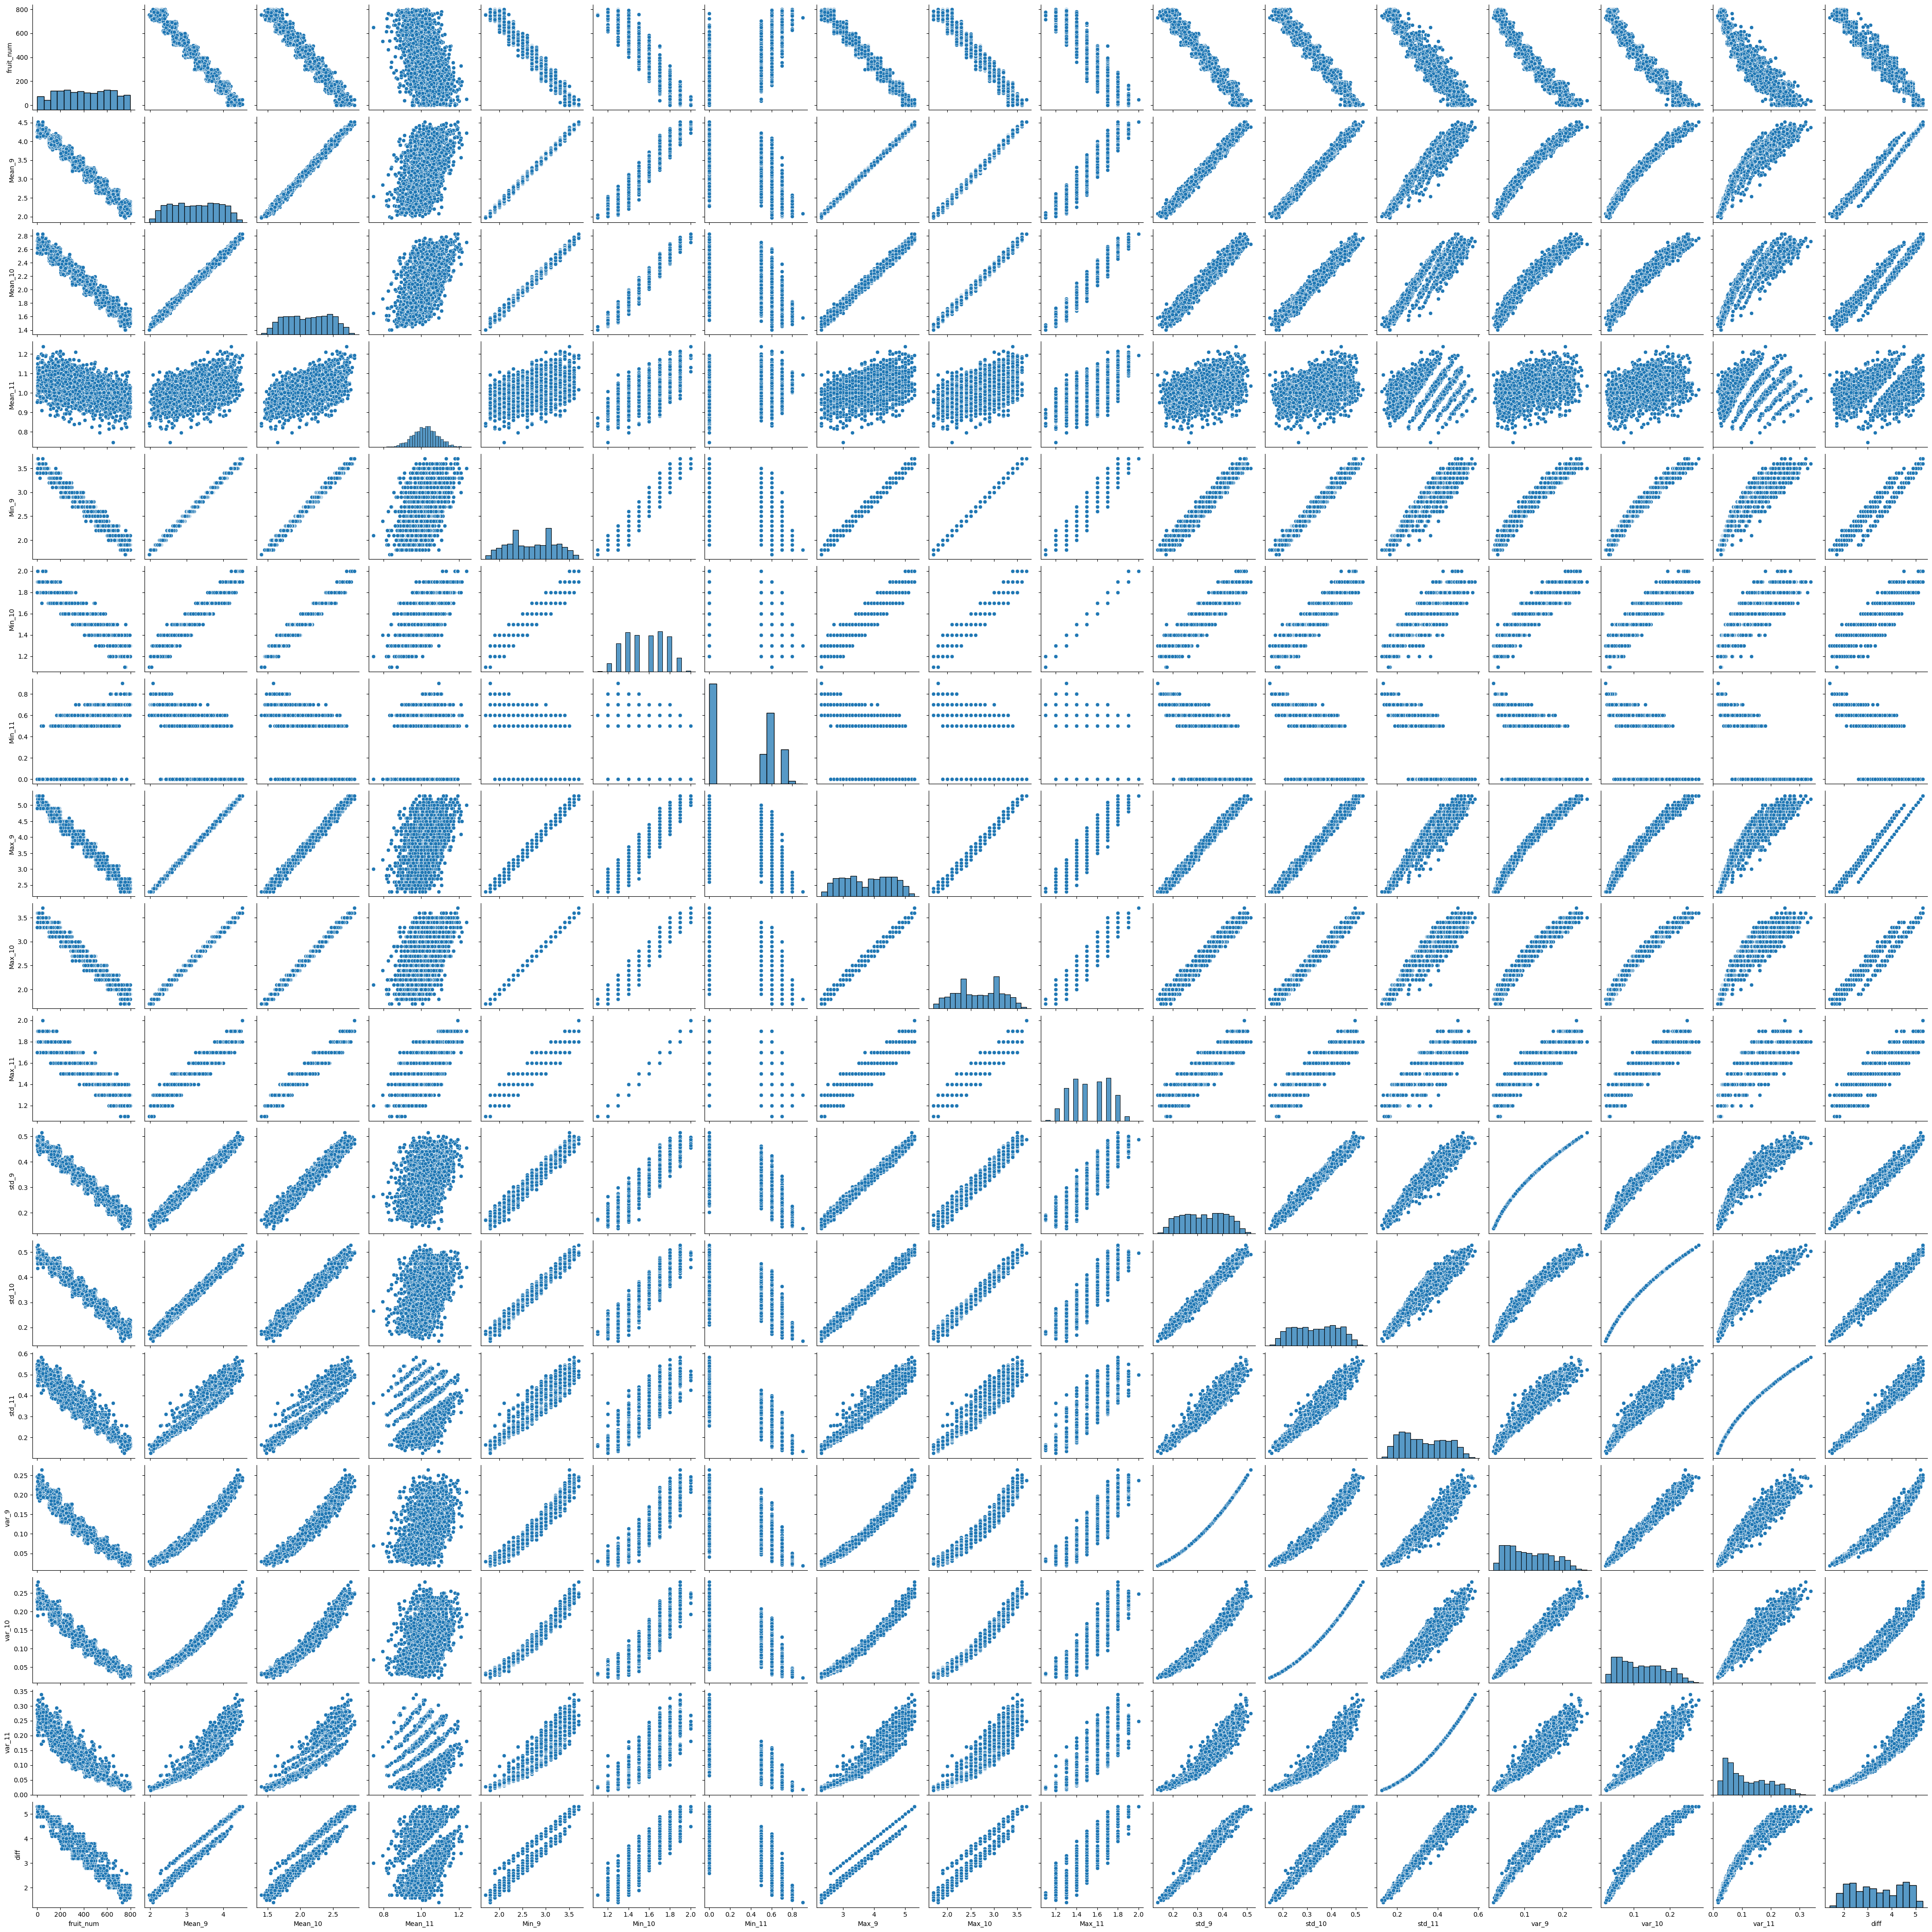

In [42]:
sns.pairplot(train_Month_ST)
plt.show()

## 월별 알아낸 점
- 월별과 착과량은 차이가 없다
- 알아낼 수 있는 건 11월달 분산이 크고(변동이 심하고), 9월에서 11월으로 갈수록 새순의 크기가 줄어든다는 점인데 이건 딱히 착과량과 관련이 없음
-> 결론은, 월별데이터를 쓸 이유가 없다

## 엽록소와 착과량 관계

In [45]:
train3 = train.iloc[:, 95:]
train3["fruit_num"] = train["착과량(int)"]
train3.head()

2022-09-01 엽록소  2022-09-02 엽록소  2022-09-03 엽록소  2022-09-04 엽록소  \
0       78.336504       78.243462       78.166501       78.127526   
1       80.116691       79.974397       79.890399       79.709278   
2       79.118529       78.941452       78.928197       78.741878   
3       77.936262       77.839523       77.815607       77.644644   
4       76.233231       76.186572       76.031032       75.886553   

   2022-09-05 엽록소  2022-09-06 엽록소  2022-09-07 엽록소  2022-09-08 엽록소  \
0       78.058021       77.915689       77.861660       77.746645   
1       79.531061       79.348139       79.151023       79.128739   
2       78.713691       78.654247       78.461743       78.323264   
3       77.546555       77.480441       77.383665       77.282036   
4       75.736449       75.735036       75.642223       75.458496   

   2022-09-09 엽록소  2022-09-10 엽록소  ...  2022-11-20 엽록소  2022-11-21 엽록소  \
0       77.592138       77.572477  ...       70.876794       70.705253   
1       79.084197       78.924476  ...       71.382303       71.253604   
2       78.219696       78.123820  ...       71.199570       71.144020   
3       77.126354       77.121300  ...       69.884124       69.845683   
4       75.380945       75.272054  ...       68.285364       68.209860   

   2022-11-22 엽록소  2022-11-23 엽록소  2022-11-24 엽록소  2022-11-25 엽록소  \
0       70.559603       70.427356       70.340491       70.293830   
1       71.092665       70.955608       70.796630       70.597550   
2       71.026740       70.920038       70.876723       70.710129   
3       69.794682       69.779813       69.614644       69.455404   
4       68.209458       68.040083       67.859963       67.775556   

   2022-11-26 엽록소  2022-11-27 엽록소  2022-11-28 엽록소  fruit_num  
0       70.262422       70.169841       70.043251        692  
1       70.565088       70.560502       70.427600        534  
2       70.595971       70.418203       70.399578        634  
3       69.281590       69.238689       69.133970        639  
4       67.701456       67.504244       67.410093        496  

[5 rows x 90 columns]

In [47]:
train3_t = train3.transpose()
train3_t

0           1           2           3           4     \
2022-09-01 엽록소   78.336504   80.116691   79.118529   77.936262   76.233231   
2022-09-02 엽록소   78.243462   79.974397   78.941452   77.839523   76.186572   
2022-09-03 엽록소   78.166501   79.890399   78.928197   77.815607   76.031032   
2022-09-04 엽록소   78.127526   79.709278   78.741878   77.644644   75.886553   
2022-09-05 엽록소   78.058021   79.531061   78.713691   77.546555   75.736449   
...                    ...         ...         ...         ...         ...   
2022-11-25 엽록소   70.293830   70.597550   70.710129   69.455404   67.775556   
2022-11-26 엽록소   70.262422   70.565088   70.595971   69.281590   67.701456   
2022-11-27 엽록소   70.169841   70.560502   70.418203   69.238689   67.504244   
2022-11-28 엽록소   70.043251   70.427600   70.399578   69.133970   67.410093   
fruit_num       692.000000  534.000000  634.000000  639.000000  496.000000   

                      5           6           7           8           9     \
2022-09-01 엽록소   79.745787   67.250443   76.545327   78.620045   74.970966   
2022-09-02 엽록소   79.743426   67.138961   76.345934   78.450327   74.848127   
2022-09-03 엽록소   79.544759   67.118094   76.268318   78.394673   74.677490   
2022-09-04 엽록소   79.410556   67.062155   76.155103   78.199884   74.549081   
2022-09-05 엽록소   79.284172   66.973306   76.036264   78.123640   74.376034   
...                    ...         ...         ...         ...         ...   
2022-11-25 엽록소   71.451541   59.376662   67.319133   69.402894   65.821086   
2022-11-26 엽록소   71.327591   59.224758   67.166627   69.307859   65.623521   
2022-11-27 엽록소   71.205664   59.121440   66.985214   69.227951   65.595522   
2022-11-28 엽록소   71.064065   59.108569   66.790623   69.114221   65.499854   
fruit_num       350.000000  689.000000  459.000000  697.000000  167.000000   

                ...        2197        2198        2199        2200  \
2022-09-01 엽록소  ...   82.437519   75.982377   75.866826   78.126116   
2022-09-02 엽록소  ...   82.301251   75.895763   75.832774   77.965015   
2022-09-03 엽록소  ...   82.173528   75.771284   75.784488   77.943638   
2022-09-04 엽록소  ...   82.040799   75.740667   75.632348   77.834970   
2022-09-05 엽록소  ...   81.955193   75.688031   75.555788   77.807050   
...             ...         ...         ...         ...         ...   
2022-11-25 엽록소  ...   73.611722   67.542790   66.777193   68.558419   
2022-11-26 엽록소  ...   73.418321   67.443818   66.705242   68.517830   
2022-11-27 엽록소  ...   73.415552   67.261007   66.629334   68.331433   
2022-11-28 엽록소  ...   73.301117   67.243715   66.429650   68.156512   
fruit_num       ...  199.000000  248.000000  465.000000  697.000000   

                      2201        2202        2203        2204        2205  \
2022-09-01 엽록소   75.226421   74.024614   81.920876   75.486518   74.110017   
2022-09-02 엽록소   75.210056   73.876933   81.898801   75.451905   74.017373   
2022-09-03 엽록소   75.196008   73.853205   81.769536   75.315223   73.886675   
2022-09-04 엽록소   75.002164   73.721799   81.607251   75.252547   73.720486   
2022-09-05 엽록소   74.807243   73.666974   81.456723   75.186170   73.712709   
...                    ...         ...         ...         ...         ...   
2022-11-25 엽록소   66.054554   65.889675   73.071705   66.734617   66.202532   
2022-11-26 엽록소   65.910545   65.734066   73.069036   66.572095   66.108962   
2022-11-27 엽록소   65.792333   65.586656   72.952559   66.506006   65.934979   
2022-11-28 엽록소   65.668746   65.560547   72.944396   66.479459   65.812084   
fruit_num       572.000000  119.000000  611.000000  650.000000  363.000000   

                     2206  
2022-09-01 엽록소  80.830756  
2022-09-02 엽록소  80.687949  
2022-09-03 엽록소  80.517089  
2022-09-04 엽록소  80.339555  
2022-09-05 엽록소  80.157257  
...                   ...  
2022-11-25 엽록소  72.208433  
2022-11-26 엽록소  72.070977  
2022-11-27 엽록소  71.872453  
2022-11-28 엽록소  71.870512  
fruit_num       17.000000  

[90 rows x 2207 colum

In [48]:
# 통계량 추가
train3_t.iloc[:-1] # 착과량 제외 전부 다 
train3_t.iloc[-1:] # fruit_nunm

train3["Mean"] = train3_t.iloc[:-1].mean()
train3["min"] = train3_t.iloc[:-1].min()
train3["Max"] = train3_t.iloc[:-1].max()
train3["std"] = train3_t.iloc[:-1].std()
train3["Var"] = train3_t.iloc[:-1].var()
train3["Diff"] = train3["2022-09-01 엽록소"] - train3["2022-11-28 엽록소"]

In [63]:
train3[['fruit_num', 'Mean', 'min', 'Max', 'std', 'Var','Diff']]

fruit_num       Mean        min        Max       std       Var      Diff
0           692  74.155836  70.043251  78.336504  2.427798  5.894201  8.293252
1           534  74.962123  70.427600  80.116691  2.813831  7.917647  9.689090
2           634  74.727999  70.399578  79.118529  2.476758  6.134332  8.718951
3           639  73.546210  69.133970  77.936262  2.641605  6.978075  8.802293
4           496  71.841067  67.410093  76.233231  2.642378  6.982160  8.823138
...         ...        ...        ...        ...       ...       ...       ...
2202        119  69.822742  65.560547  74.024614  2.481985  6.160248  8.464066
2203        611  77.262155  72.944396  81.920876  2.681104  7.188319  8.976479
2204        650  71.165328  66.479459  75.486518  2.613637  6.831096  9.007058
2205        363  70.019605  65.812084  74.110017  2.376784  5.649101  8.297933
2206         17  76.090699  71.870512  80.830756  2.490503  6.202603  8.960244

[2207 rows x 7 columns]

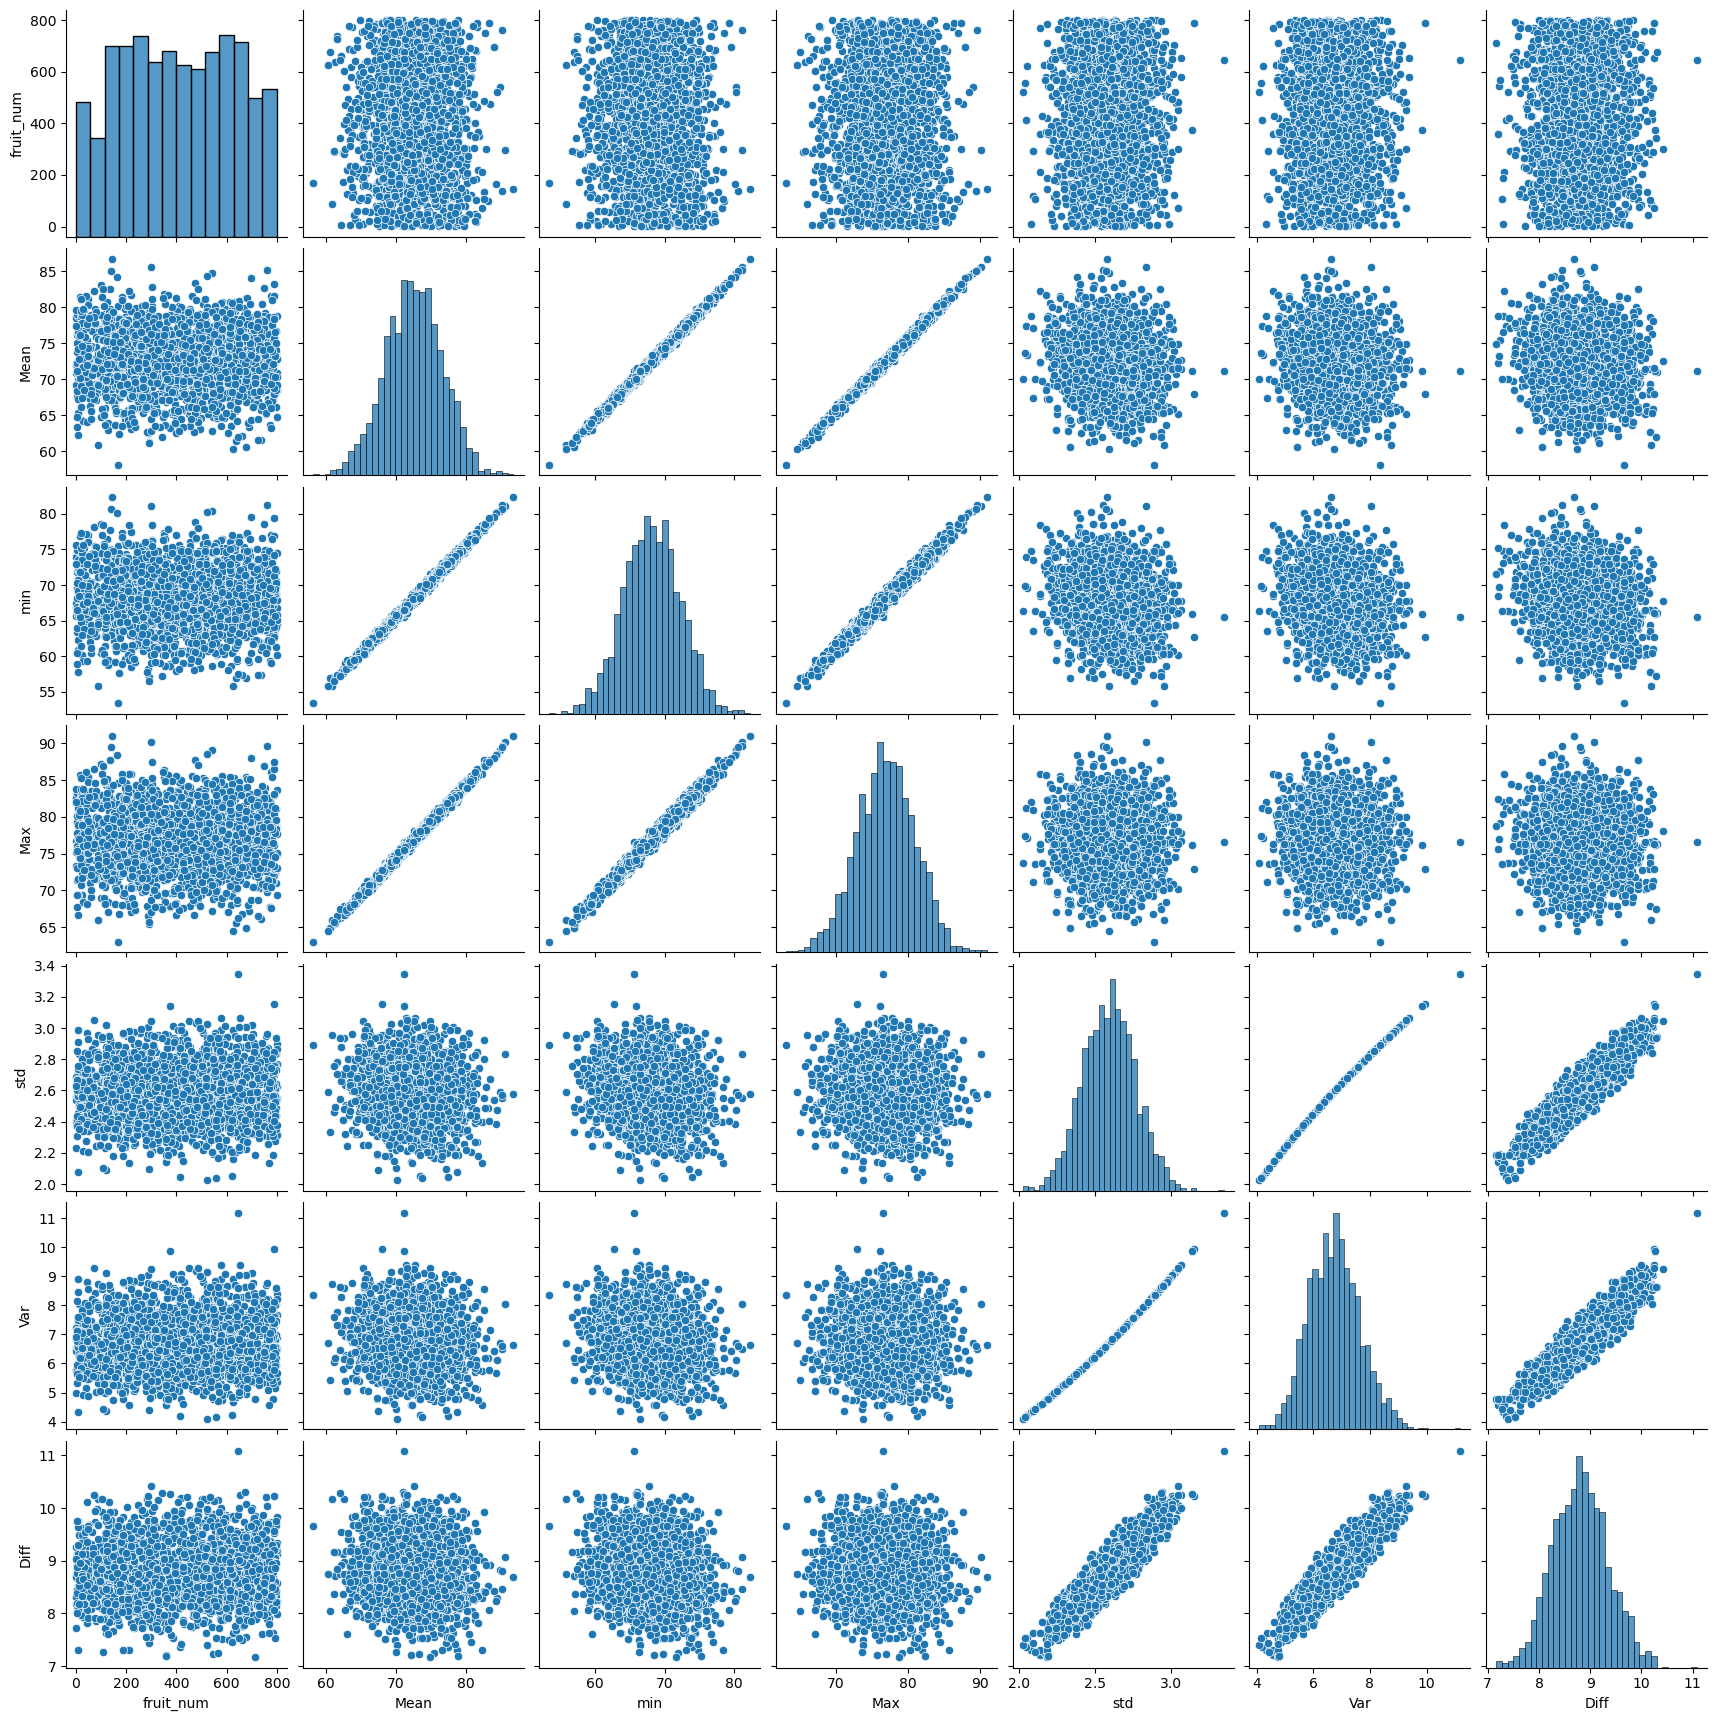

In [64]:
sns.pairplot(train3[['fruit_num', 'Mean', 'min', 'Max', 'std', 'Var','Diff']])
plt.show()

## 엥 엽록소 좃도 상관없음

## 이상치 있나?
- min값은 너무 0이 많아서 아예 빼고 돌리는게 나은듯

In [55]:
train2.columns

Index(['2022-09-01 새순', '2022-09-02 새순', '2022-09-03 새순', '2022-09-04 새순',
       '2022-09-05 새순', '2022-09-06 새순', '2022-09-07 새순', '2022-09-08 새순',
       '2022-09-09 새순', '2022-09-10 새순', '2022-09-11 새순', '2022-09-12 새순',
       '2022-09-13 새순', '2022-09-14 새순', '2022-09-15 새순', '2022-09-16 새순',
       '2022-09-17 새순', '2022-09-18 새순', '2022-09-19 새순', '2022-09-20 새순',
       '2022-09-21 새순', '2022-09-22 새순', '2022-09-23 새순', '2022-09-24 새순',
       '2022-09-25 새순', '2022-09-26 새순', '2022-09-27 새순', '2022-09-28 새순',
       '2022-09-29 새순', '2022-09-30 새순', '2022-10-01 새순', '2022-10-02 새순',
       '2022-10-03 새순', '2022-10-04 새순', '2022-10-05 새순', '2022-10-06 새순',
       '2022-10-07 새순', '2022-10-08 새순', '2022-10-09 새순', '2022-10-10 새순',
       '2022-10-11 새순', '2022-10-12 새순', '2022-10-13 새순', '2022-10-14 새순',
       '2022-10-15 새순', '2022-10-16 새순', '2022-10-17 새순', '2022-10-18 새순',
       '2022-10-19 새순', '2022-10-20 새순', '2022-10-21 새순', '2022-10-22 새순',
       '2022-10-23 새순', '

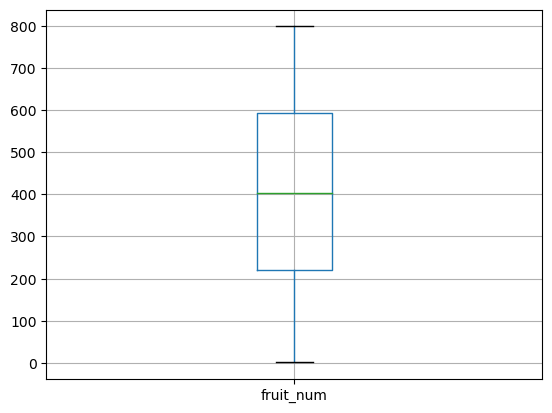

In [56]:
# 'fruit_num', 'Mean', 'min', 'Max', 'std', 'Var','Diff'
train2.boxplot(column= 'fruit_num' )
plt.show()

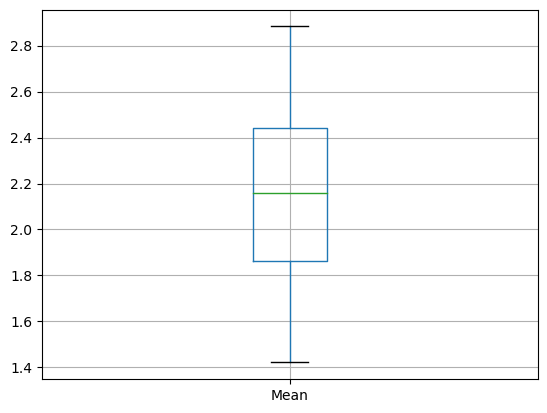

In [57]:
train2.boxplot(column= 'Mean' )
plt.show()

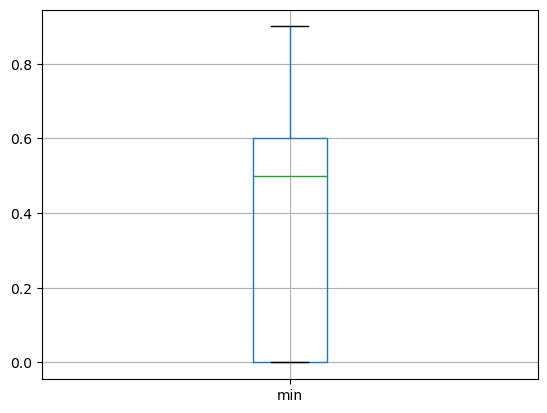

In [58]:
train2.boxplot(column= 'min' )
plt.show()

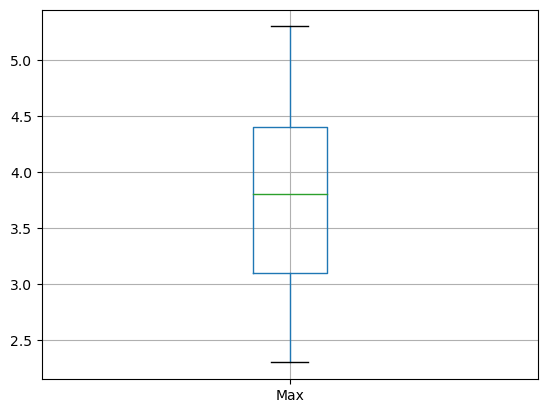

In [59]:
train2.boxplot(column= 'Max' )
plt.show()

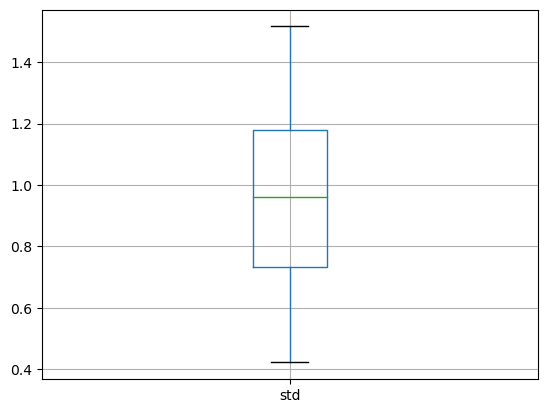

In [60]:
train2.boxplot(column= 'std' )
plt.show()

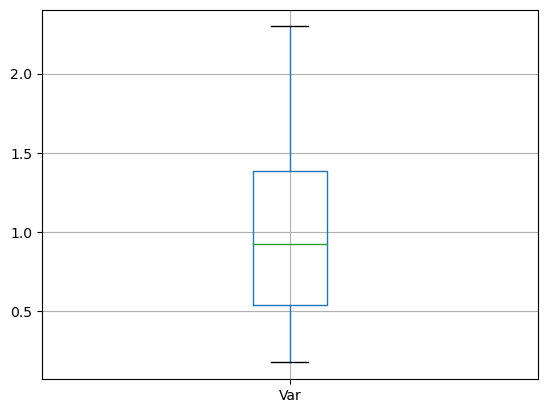

In [61]:
train2.boxplot(column= 'Var' )
plt.show()

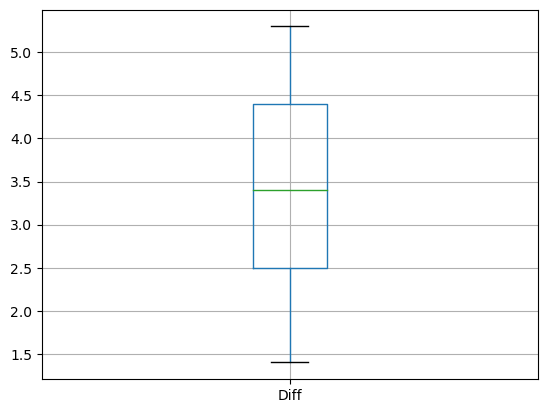

In [62]:
train2.boxplot(column= 'Diff' )
plt.show()